# **Análise do DataSet**
***
##### Os objetivos buscados por esse script são:
1. visualizar comportamento da evolução do preço da gasolina x evolução do preço da gasolina ajustado à inflação;
2. saber quais regiões possuem maior preço médio da gasolina.
***

In [20]:
# Bibliotecas que serão utilizadas
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np

from sqlite3   import connect

***
### Coletando dados

In [21]:
# Fazendo conexão com banco de dados do projeto
conn = connect( 'dados.db' )

In [22]:
# Coletando dataframe a ser utilizado na análise
with open( 'preco_gasolina.sql', 'r', encoding = 'utf-8' ) as arquivo:
    
    # Lendo conteúdo do arquivo
    query = arquivo.read()
    
    # Executando consulta ao banco de dados com conteúdo do arquivo
    df = pd.read_sql_query( query,
                            conn,
                            parse_dates = 'data_coleta',
                            dtype = { 'preco_venda'    : float,
                                      'preco_corrigido': float } )

In [23]:
# Visualizando resultado
df.head()

,data_coleta,preco_venda,preco_corrigido,id_municipio_completo,nome_municipio,nome_uf,sigla_uf,regiao_uf
0,2021-01-01,4.399,4.749390,3536505,Paulínia,São Paulo,SP,Sudeste
1,2021-01-01,4.149,4.479477,3552403,Sumaré,São Paulo,SP,Sudeste
2,2021-01-01,4.199,4.533459,3536505,Paulínia,São Paulo,SP,Sudeste
3,2021-01-01,4.499,4.857355,4320008,Sapucaia do Sul,Rio Grande do Sul,RS,Sul
4,2021-01-01,4.469,4.824965,4320008,Sapucaia do Sul,Rio Grande do Sul,RS,Sul


***
### Entendendo os dados

In [24]:
# Descrevendo o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641475 entries, 0 to 6641474
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   data_coleta            datetime64[ns]
 1   preco_venda            float64       
 2   preco_corrigido        float64       
 3   id_municipio_completo  object        
 4   nome_municipio         object        
 5   nome_uf                object        
 6   sigla_uf               object        
 7   regiao_uf              object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 405.4+ MB


In [25]:
# Observando cenário estatístico dos valores
df.describe().round(2)

,preco_venda,preco_corrigido
count,6641475.00,6641475.00
mean,3.05,5.20
std,0.78,0.58
min,1.39,2.91
25%,2.54,4.75
50%,2.76,5.11
75%,3.35,5.60
max,7.50,8.69


#### Análise do resultado
<font size = '3'>
Podemos observar que o cenário real é bastante diferente do corrigido. A média do preço deste último<br>
é 70,5% maior que a real, isso demonsta a importância de se olhar dados financeiros/econômicos históricos<br>
por meio da ótica do ajuste inflacionário, pois a visão não parte da quantia absoluta, mas sim do ponto de vista do<br>
poder de comprar.<br><br>
Outro ponto de observação é a diferença relativa do desvio padrão observado nas duas séries. Utilizando-se<br>
do coeficiente de variação(CV) ( desv. p. ÷ média ), temos que o CV do preco_venda é 25,59%, enquanto o preco_corrigido tem CV de 11,25%;<br>
ou seja, na série com ajuste inflacionário, o preço variou menos que o preço real.
</font>

***
### Comportamento da evolução do preço da gasolina x evolução do preço da gasolina ajustado a inflação

In [26]:
# Gerando dataframe para o gráfico
df_evolucao = ( df
                  # Agrupando tabela pelos dias
                  .groupby( by = 'data_coleta', as_index = False )[ ['preco_venda', 'preco_corrigido'] ]
                  
                  # Gerando média diária do R$/L da gasolina
                  .mean() )

In [27]:
# Visualizando resultado
df_evolucao.head()

,data_coleta,preco_venda,preco_corrigido
0,2005-01-03,2.306641,5.753634
1,2005-01-04,2.341689,5.841057
2,2005-01-05,2.306009,5.752057
3,2005-01-06,2.348056,5.856938
4,2005-01-10,2.329102,5.809660


In [28]:
# Descrevendo o dataframe
df_evolucao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data_coleta      3579 non-null   datetime64[ns]
 1   preco_venda      3579 non-null   float64       
 2   preco_corrigido  3579 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 84.0 KB


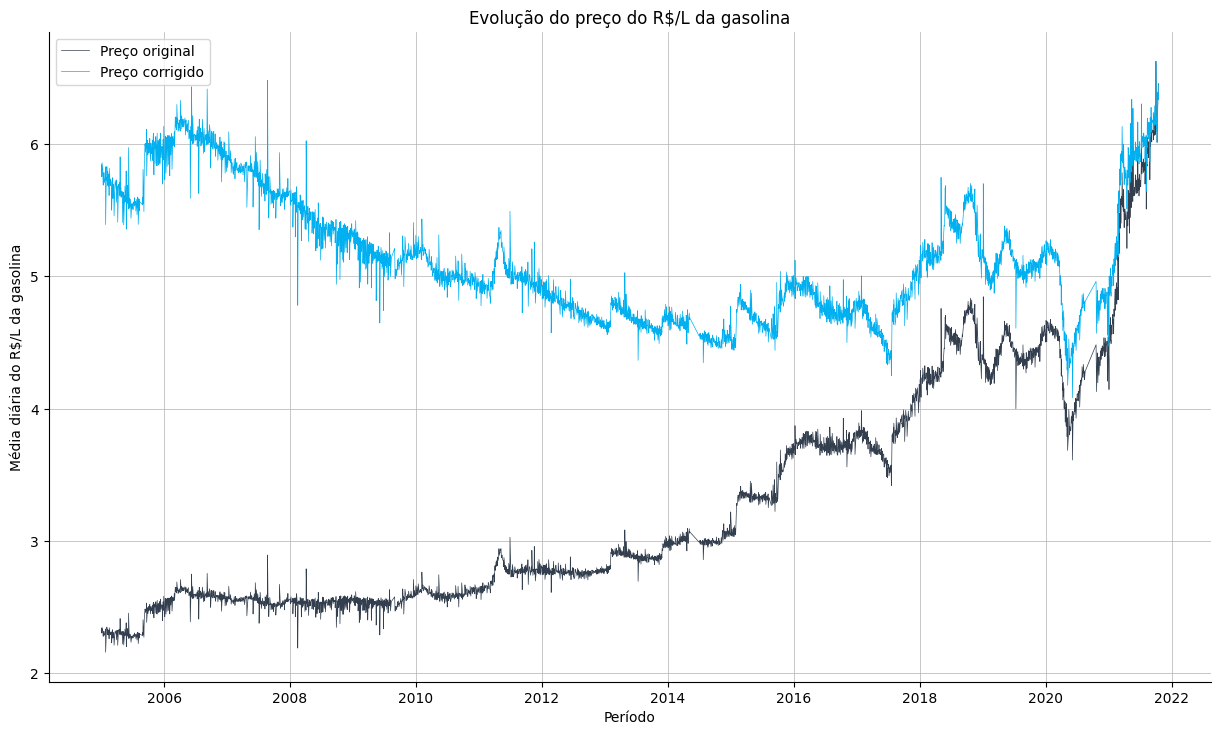

In [29]:
# Dados que serão plotados no gráfico
x  = df_evolucao['data_coleta'    ]
y1 = df_evolucao['preco_venda'    ]
y2 = df_evolucao['preco_corrigido']

# Definindo tamanho do gráfico
plt.figure( figsize = ( 15, 8.44) )

# Definindo as linhas que serão plotadas
plt.plot( x,
          y1,
          label     = 'Preço original',
          color     = '#333F4F',
          linestyle = 'solid',
          linewidth = 0.5 )

plt.plot( x,
          y2,
          label     = 'Preço corrigido',
          color     = '#00B0F0',
          linestyle = 'solid',
          linewidth = 0.5 )

# Ajustando nomes
plt.title ( 'Evolução do preço do R$/L da gasolina')
plt.xlabel( 'Período'                              )
plt.ylabel( 'Média diária do R$/L da gasolina'     )
plt.legend()

# Ajustando traços de contornos do gráfico
plt.grid( True, linewidth = 0.5 )
plt.gca()\
   .spines[['top','right']]\
   .set_visible(False)

# Apresentando gráfico                         
plt.show()

#### Análise do resultado
<font size = '3'>O evolução do preço corrigido pela inflação possui uma diferença alta em relação ao preço real,<br>
e há uma semelhança considerável entre o valor do preço ajustado estabelecido em 2005|2006|2007 e 2021,<br>
acima de R$ 5,00 reais.<br><br>
Podemos concluir que, partindo do ponto de vista do poder de compra, o valor da gasolina em 10/2021<br>
também esteve ativo entre 2005 e 2007, sendo o melhor momento do preço do litro entre 2012 e 2017
</font>

***
### Quais regiões possuem maior preço médio da gasolina?

In [30]:
# Gerando dataframe para o gráfico
df_regioes = (
    
    df
        # Agrupando tabela pelos dias
        .groupby( by = ['regiao_uf'], as_index = False )['preco_corrigido']
        
        # Gerando média diária do R$/L da gasolina
        .mean().round(2)

        # Rankeando tabela
        .sort_values('preco_corrigido', ascending = False)

        # Ajustando index após rankeamento da tabela
        .reset_index( drop = True )

        # Coluna p/ evidenciar diferença % do mais caro contra os mais baratos
        .assign( percent_dif = lambda df: round( ( df['preco_corrigido'] / df['preco_corrigido'][ min(df.index) ] - 1 ) * 100, 2 ) ) )

In [31]:
# Visualizando resultado
df_regioes.head()

,regiao_uf,preco_corrigido,percent_dif
0,Norte,5.51,0.00
1,Centro-Oeste,5.37,-2.54
2,Nordeste,5.25,-4.72
3,Sul,5.20,-5.63
4,Sudeste,5.11,-7.26


#### Análise do resultado
<font size = '3'>
Podemos observar que, durante o período observado, a região Norte se classifica como o Real por L médio<br>
mais caro do Brasil. Já as regiões ao Sul do país, possuem o menor preço médio de gasolina nacional.<br><br>
Na coluna 'percent_dif', podemos observar que o menor Real por L médio é 7,26% menor que o mais caro.
</font>

***

### Resumo dos resultados

<font size = '3'>

1 A série com ajuste inflacionário, comparando com a série real:<br><br>
> • tem média de preço do litro 70,5% maior, demonstrando o impacto da inflação e;<br>
> • ela é menor em -14,34% pontos percentuais no desvio padrão, demonstrando variar menos.<br><br>

2 Partindo do ponto de vista do poder de compra, o valor da gasolina em 10/2021 também esteve<br>
  ativo entre 2005 e 2007, sendo o melhor momento do preço do litro entre 2012 e 2017

3 Já as regiões ao Sul do país, possuem o menor preço médio de gasolina nacional.
</font>